# PIT - Práctica 1: Análisis de Series Temporales - Modelos Clásicos

**Alicia Lozano Díez**

19 de febrero de 2024


Grupo: 2

Nombres: Javier Alarcón y Enrique Ernesto de Alvear


## Objetivo

El objetivo de esta práctica es proporcionar una introducción al procesamiento y análisis de señales temporales: descomposición de una serie temporal para el estudio de sus propiedades, ajuste de modelos lineales (ARIMA) y predicción.

### Materiales - Moodle

- Guión (.ipynb) de la práctica
- Datos (.csv): bases de datos _AirPassengers.csv_ y _stocks_1yr.csv_.


# 1. Introducción al procesamiento de señales temporales: Air Passengers

## 1.1. Cargar los datos en Google Colab y manejo de los datos en Python

Primero vamos a descargar el fichero con los datos de la base de datos *AirPassengers.csv* de Moodle, que contiene los datos del número de pasajeros de una aerolínea para un periodo de tiempo.

Las siguientes líneas de código nos permitirán subir el archivo a Google Colab desde el disco local:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


A continuación, vamos a leer el fichero *AirPassengers.csv* en Python, con la ayuda de la librería *pandas*.

Lo cargaremos haciendo uso también del módulo de Python *datetime* para operar con este tipo de datos de forma cómoda.

La función definida *parser* nos permitirá cambiar el formato de fecha/tiempo al formato que esperamos encontrar en nuestra base de datos.

In [ ]:
from pandas import read_csv
from datetime import datetime
import numpy as np

def parser(x):
	return datetime.strptime(x, '%Y-%m')

data = read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0,
                squeeze=True, date_parser=parser)
print(data.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


<ipython-input-72-2338f9b18d4a>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0,


Podemos visualizar cómo está indexada la estructura de datos, así como el número de datos que tiene nuestra serie temporal.

In [ ]:
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Si queremos acceder a un dato en concreto, por ejemplo, el número de pasajeros del mes de marzo de 1949, podemos hacerlo de la siguiente forma:

In [ ]:
data['1949-03-01']


132

O de esta otra:

In [ ]:
data[datetime(1949,3,1)]

132

## 1.2. Representación de los datos


El primer paso para analizar una serie temporal es obtener una representación de los datos, para poder hacernos una idea de las características de la serie de forma visual.

Para ello, podemos utilizar la librería *matplotlib* como sigue:

Text(0.5, 1.0, 'Serie temporal: Air Passengers')

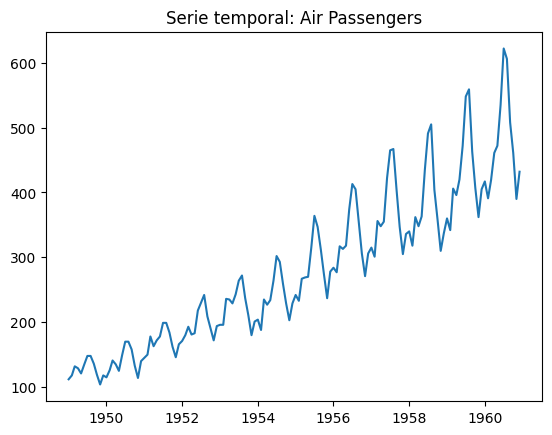

In [ ]:
from matplotlib import pyplot as plt
plt.plot(data)
plt.title('Serie temporal: Air Passengers')

## 1.3. Estudio de la estacionariedad de la serie


Algunos de los modelos de análisis de series temporales asumen estacionariedad en las series. Por ello, vamos a ver dos métodos para comprobar si una serie es estacionaria.

Uno de ellos es un análisis más visual: calculamos la media y desviación estándar "móviles" (con una ventana deslizante).

In [ ]:
import pandas as pd

def test_stationarity_1(timeseries,window_size):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

El segundo método consiste en el test estadístico Dickey-Fuller:

In [ ]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
def test_stationarity_2(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def test_stationarity(timeseries,window_size):
  test_stationarity_1(timeseries,window_size)
  test_stationarity_2(timeseries)

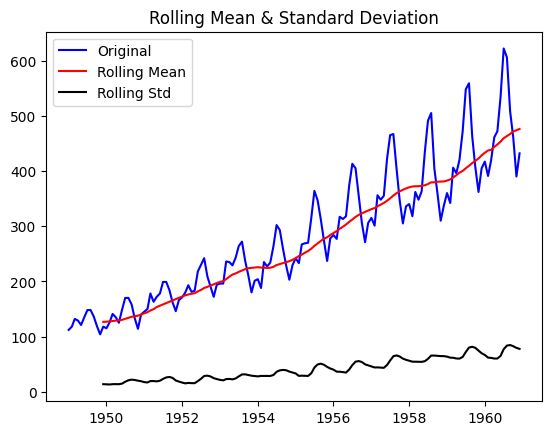

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data,12)

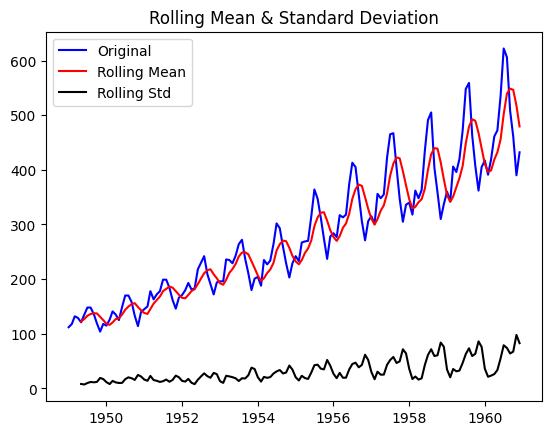

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data,5) #Tamaño de ventana = 5

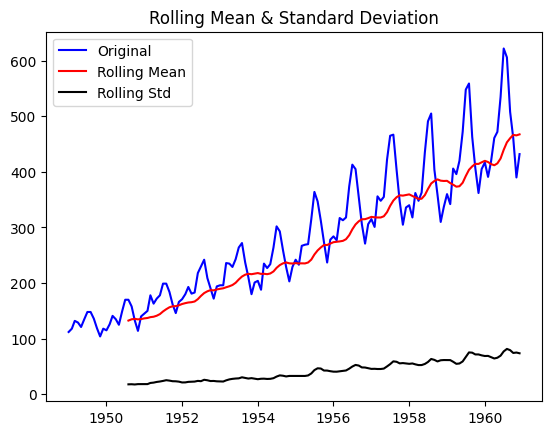

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data,20) #Tamaño de ventana = 20

**PREGUNTAS**

1.   ¿Qué conclusiones puede extraer del análisis de estacionariedad de la serie original?
    
    El p-valor es 0.99>0.05 por lo que no podemos rechazar la hipótesis nula, es decir, asumimos que la serie no es estacionaria,  por otro lado, observando la gráfica, tambien llegamos a la misma conclusión, ya que la media va creciendo.

2.   ¿Qué diferencias observas al variar el tamaño de la ventana para hacer las medias móviles? Prueba con un par de tamaños, incluye las gráficas obtenidas y explica las diferencias visuales que aprecias.

    Cuando reducimos el tamaño de la ventana a 5 podemos ver que produce más oscilaciones, ya que la ventana es demasiado pequeña y ve los datos muy locales, por tanto, las oscilaciones de la serie se notan más.
    
    Por otro lado si aumentamos el tamaño de la ventana a 20, vemos que la media está ligeramente por debajo de los valores de la serie, ya que se están teniendo en cuenta valores de instantes muy atrasados, lo cual baja la media debido a la tendencia creciente de la serie.

## 1.4. Transformar una serie temporal en estacionaria

Como hemos visto en la teoría, para analizar la serie y poder ajustarle un modelo tipo AR, MA o ARMA, esperamos que la serie a modelar sea estacionaria.

Para conseguir una serie lo más estacionaria posible, podemos aplicar distintas transformaciones de la serie original. Vamos a ver algunos ejemplos:

a) *Transformaciones simples para reducir el efecto de la tendendia*:

En el caso de los datos del ejemplo, la tendencia es positiva, por lo que podemos aplicar alguna transformación que penalice los valores más altos y menos los más bajos. Es el caso del logaritmo, la raíz cuadrada, etc.

**PREGUNTA**


1.   Representa a continuación la serie aplicándole una transformación logarítmica. ¿Qué observas?



In [ ]:
data_log = np.log(data)

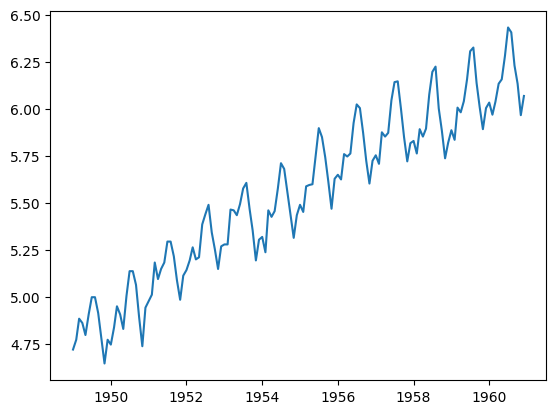

In [ ]:
plt.plot(data_log)

En casos más complejos en los que la tendencia no se ve clara (sobre todo en presencia de ruido), se pueden aplicar otros métodos. Uno de ellos es el suavizado como las medias móviles (*moving average*).

Por ejemplo, podemos aplicar un suavizado con una media con ventana deslizante que tenga en cuenta un año (12 meses).
Ten en cuenta, que esto implicará que para calcular la media de las primeras muestras, no tengo suficientes datos para la ventana. Esto lo podemos ver en la salida de la media móvil (tendremos que eliminar los *NaN* que aparecen).


**PREGUNTAS**


1.   Aplica dicha media móvil y represéntala junto a los datos. Puede utilizar los datos en escala logarítmica. ¿Esta media móvil representa claramente la tendencia de la serie?

2.   Elimina ahora de la serie original (transformada con el logaritmo si es como la has calculado previamente) la influencia de esta media móvil y representa el resultado. ¿Qué observas ahora?

3.   Realiza el test de estacionariedad de la serie resultante y compáralo con el de la serie original. ¿Qué conclusiones puedes obtener tanto del test visual como del test estadístico?






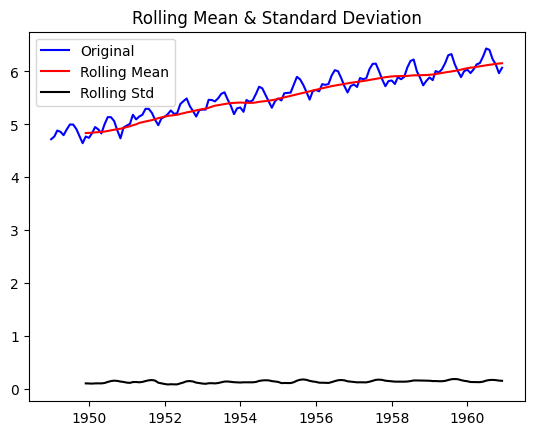

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data_log,12)

Podemos ver que pese a tener los datos en escala logarítmica, la media movil sigue representando la tendencia de la serie.

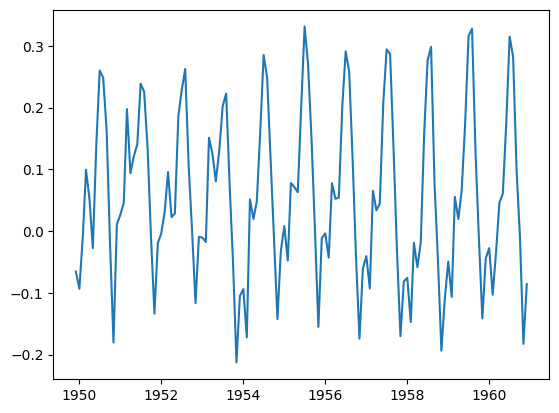

In [ ]:
rolmean_log = data_log.rolling(window=12).mean()
dif_log = data_log-rolmean_log
dif_log = dif_log.dropna()
plt.plot(dif_log)


Una vez eliminada la influencia de la media, podemos observar que la serie si que es estacionaria.

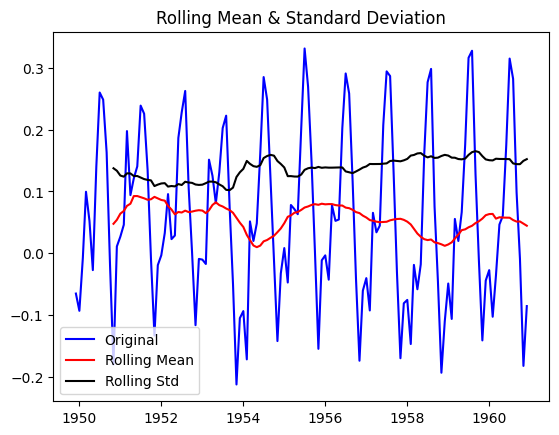

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(dif_log, 12)

Como el p-valor = $0.02< 0.05=\alpha$ podemos rechazar la hipótesis nula, es decir, la serie es estacionaria.

b) *Diferenciar (derivar)*:

Las técnicas anteriores son sencillas y pueden eliminar parte de la influencia de la tendencia de la serie, pero no suelen ser suficientes cuando se tiene por ejemplo estacionalidad.

Diferenciar (o derivar) es uno de los métodos más comunes para eliminar la influencia de la tendencia y la estacionalidad en la serie original, mejorando las propiedades de estacionariedad de la serie.

Podemos tomar la derivada de orden uno de la siguiente manera (partimos de la serie en el dominio logarítmico):

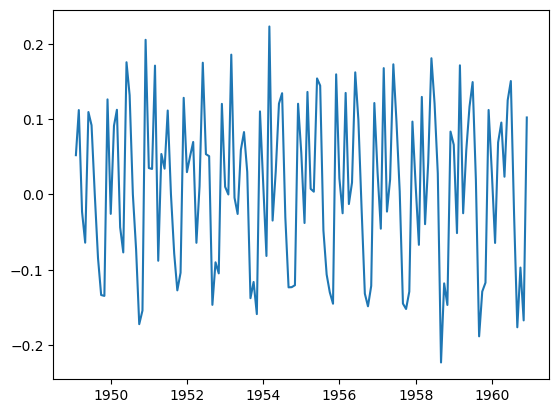

In [ ]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)

**PREGUNTAS**


1.   ¿Qué observas en la serie resultante?
2.   ¿Es esta serie estacionaria de acuerdo a los criterios anteriores? Incluye los resultados gráficos y del test estadístico e interprétalos.
3. Repite el proceso para una segunda derivada. ¿Qué observas ahora?



En primer lugar, podemos observar en la serie resultante cierta periocidad. Por otro lado, se ha eliminado la tendencia de la serie, por lo que es estacionaria.

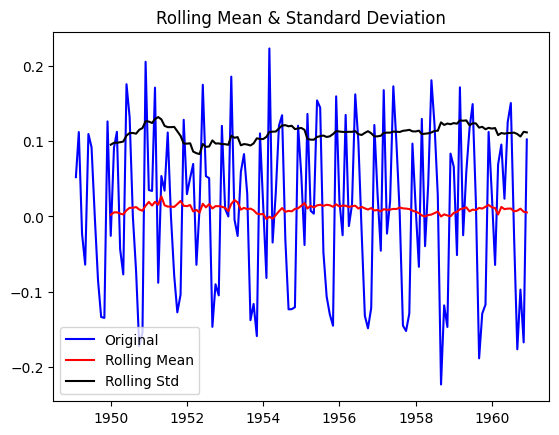

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
data_log_diff = data_log_diff.dropna()
test_stationarity(data_log_diff, 12)

A primera vista, podemos observar que parece estacionaria, sin embargo observando que el p.valor=0.07 dependiendo del nivel de confianza que queramos, se puede rechazar o no la hipótesis de estacionalidad. Si tomamos $\alpha = 0.05$ entonces aceptaríamos la hipotesis nula y por tanto la serie no sería estacionaria.

Vamos a derivar de nuevo la serie para ver si se vuelve estacionaria.

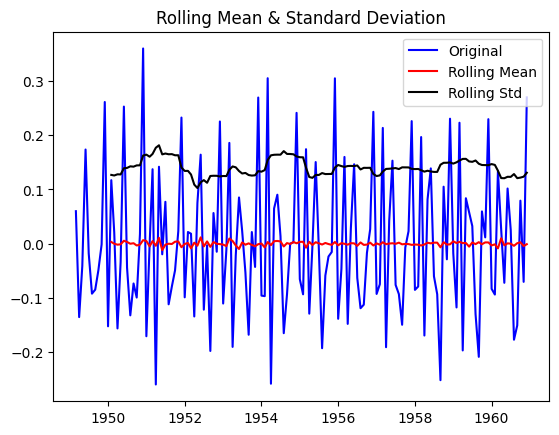

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [ ]:
data_log_diff2 = data_log_diff - data_log_diff.shift()
data_log_diff2 = data_log_diff2.dropna()
test_stationarity(data_log_diff2, 12)

Con la segunda derivada si podemos rechazar la hipótesis nula, ya que p-valor = $7.42*10^{-13}$ y por tanto la serie seria estacionaria.

c) *Descomposición de la serie*:

La mayoría de series pueden descomponerse en tendencia, estacionalidad y residuo, como hemos visto en clase.

Utilizando la función *seasonal_decompose* del módulo de Python *statsmodels* podemos obtener estas tres componentes y por tanto, modelarlas por separado:

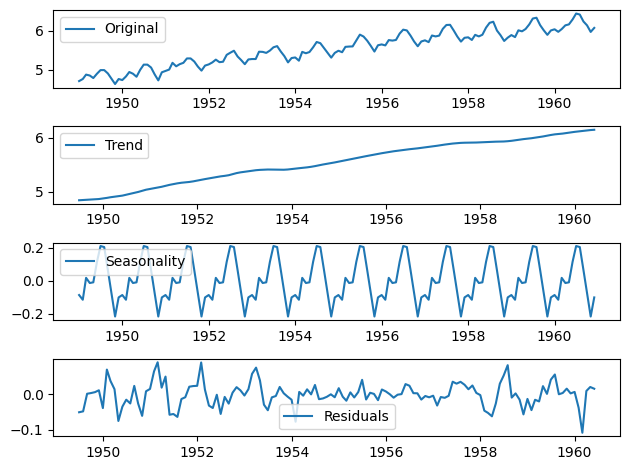

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**PREGUNTAS**

1.   ¿Es la señal residual estacionaria? Realiza el test y comenta los resultados.



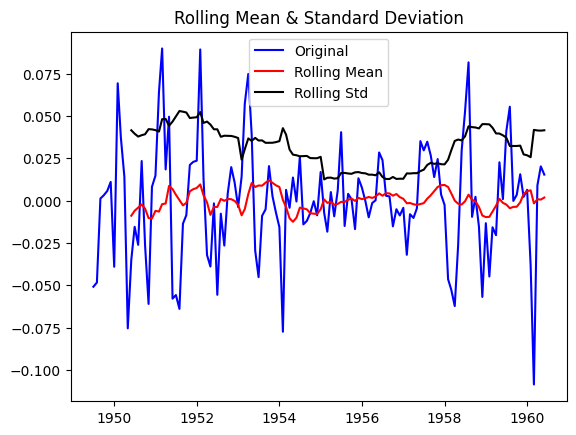

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
residual_sinna = residual.dropna()
test_stationarity(residual_sinna,12)

Como el p-valor = $2.88*10^{-8}$ rechazamos la hipótesis de nula y por tanto la serie es estacionaria.

## 1.5. Modelado ARIMA y predicción

Uno de los modelos clásicos para series temporales vistos en clase es el modelo ARIMA, que permite derivar *d* veces, y aplicar *p* coeficientes autorregresivos (AR) y *q* términos de error (shocks, provenientes de la parte MA) en la combinación lineal.  

Para determinar el valor de los parámetros *p* y *q*, podemos hacer uso de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).

Si calculamos dichas funciones para la serie derivada previamente, obtenemos lo siguiente:

Text(0.5, 1.0, 'Partial Autocorrelation Function')

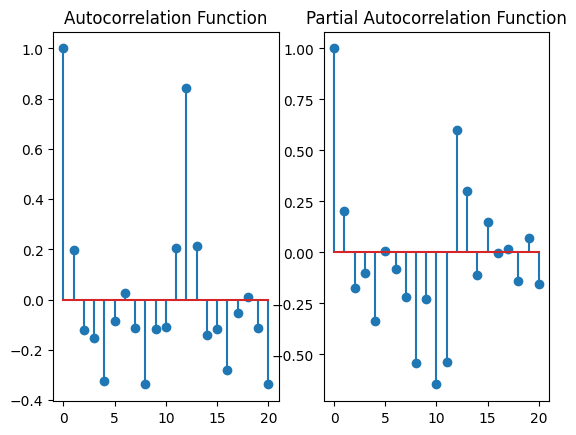

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20, fft=False)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.title('Partial Autocorrelation Function')

Podemos añadir además un intervalo de confianza a ambos lados del valor cero, de tal manera que el primer valor de retardo que cruce ese intervalo por arriba en la función de PACF será el valor de *p*, y de ACF, será *q*.

Para los niveles de confianza estándar, el valor del límite del intervalo de confianza al 95% es 1.96. Suponiendo desviación estándar unidad, el límite estaría en (-1.96/sqrt(N), 1.96/sqrt(N)), donde N es el número de puntos.

Si incluimos estos límites en la figura anterior, podemos obtener una buena aproximación de los valores de *p* y *q* para el modelo ARIMA:

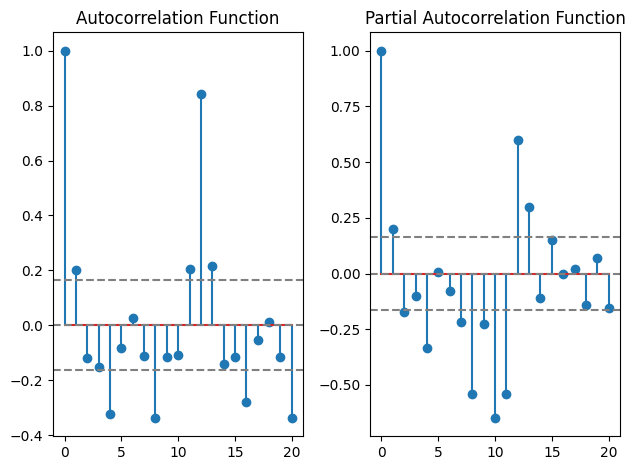

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**PREGUNTAS**


1.   ¿Qué valores de *p* y *q* utilizarías para un primer modelo ARIMA de acuerdo a las representaciones anteriores?

    Según las diapositivas vistas en clase, el valor de "p" y "q" será el valor del desplazamiento donde se alcanza el último pico importante en PACF y ACF respectivamente, lo que nos da como valores p=3 y q=2.



Una vez elegidos los valores de *p* y *q*, podemos utilizar también la derivación interna de la clase ARIMA (*d*) o aplicarlo sobre la serie previamente derivada con valor de *d=0*.

A continuación, importamos el modelo ARIMA de la siguiente manera.

Este modelo tiene como argumentos los datos, y el orden:

model = ARIMA(datos, order = (p,d,q))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


**PREGUNTAS**


1.   A continuación, completa los valores de p, d y q y utiliza el siguiente código para ajustar un modelo tipo AR. Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

2.    Repite el código con los valores de los parámetros correspondientes para ajustar un modelo MA. Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

3.    Repite nuevamente el código para combinar los modelos anteriores (ARMA). Incluye el resultado en el informe de la práctica así como los valores elegidos. ¿Qué error de ajuste (RSS) se obtiene?

4.   De acuerdo a los valores de RSS, ¿cuál dirías que es el modelo que mejor se ajusta a los datos?

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Modelo AR: RSS: 0.12140761325449337')

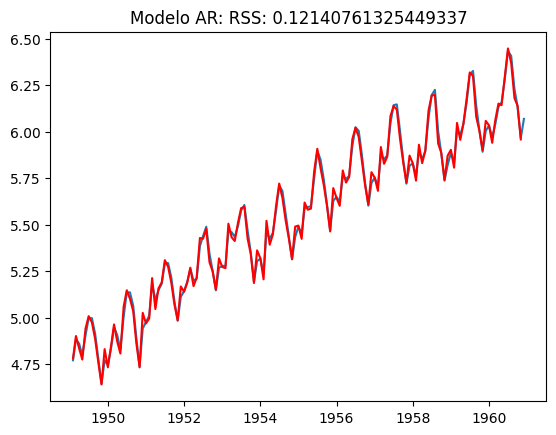

In [ ]:
p =3
d =1
q =0

# AR
model = ARIMA(data_log, order=(p, d, q))
results_AR = model.fit()
plt.plot(data_log[1:])
plt.plot(results_AR.fittedvalues[1:].shift(periods =-1), color='red')
RSS = results_AR.fittedvalues[1:].shift(periods =-1)-data_log[1:]
RSS = RSS.dropna()
plt.title('Modelo AR: '+ f"RSS: {sum(RSS**2)}")
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Modelo MA: RSS: 0.18899751314624405')

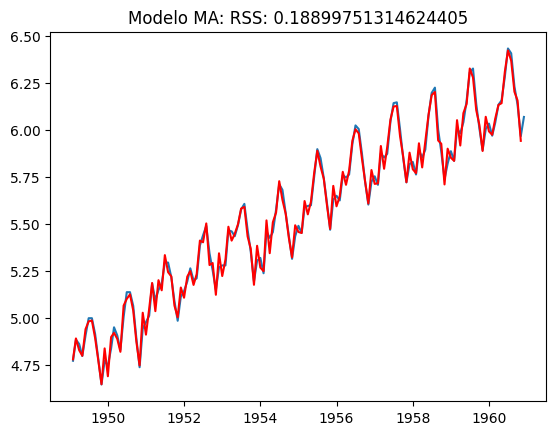

In [ ]:
p =0
d =1
q =2

# AR
model = ARIMA(data_log, order=(p, d, q))
results_MA = model.fit()
RSS = results_MA.fittedvalues[1:].shift(periods =-1)-data_log[1:]
RSS = RSS.dropna()
plt.plot(data_log[1:])
plt.plot(results_MA.fittedvalues[1:].shift(periods =-1), color='red')
plt.title('Modelo MA: '+ f"RSS: {sum(RSS**2)}")
# RSS: Residual sum of squares

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Text(0.5, 1.0, 'Modelo ARMA: RSS: 0.2439976324845211')

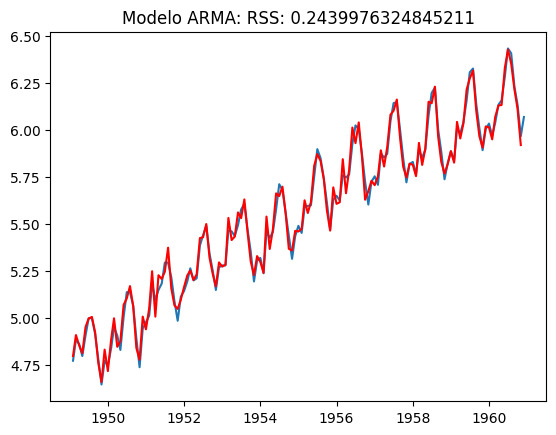

In [ ]:
p =3
d =0
q =2

# AR
model = ARIMA(data_log, order=(p, d, q))
results_ARMA = model.fit()
RSS = results_ARMA.fittedvalues[1:].shift(periods =-1)-data_log[1:]
RSS = RSS.dropna()
plt.plot(data_log[1:])
plt.plot(results_ARMA.fittedvalues[1:].shift(periods =-1), color='red')
plt.title('Modelo ARMA: '+ f"RSS: {sum(RSS**2)}")
# RSS: Residual sum of squares

De acuerdo a los valores RSS nos quedaríamos con el modelo AR, con RSS=0.1214

Por último, para predecir valores en el espacio original, tenemos que deshacer las transformaciones realizadas hasta el momento.

Primero, tomamos los valores ajustados por el modelo (predicciones) y los guardamos como serie temporal.

Estos valores empiezan en el segundo mes, puesto que hemos tomado diferencias (derivada) de orden 1.

In [ ]:
# Predicciones en el espacio original
predictions_ARIMA_log = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_log.head())


Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.781504
1949-04-01    4.901242
1949-05-01    4.833743
dtype: float64


Las nuevas versiones de la librería, ya devuelven la operación de diferencias (en escala logarítmica) "eliminada", por lo que no necesitamos deshacerla con una suma acumulativa. Y por tanto, sólo necesitamos revertir la operación logarítmica. Para ello, aplicamos la función exponencial (inversa del logaritmo).

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log[1:])

Podemos calcular el error cuadrático medio en el espacio original.

Text(0.5, 1.0, 'RMSE: 8.849247282952009')

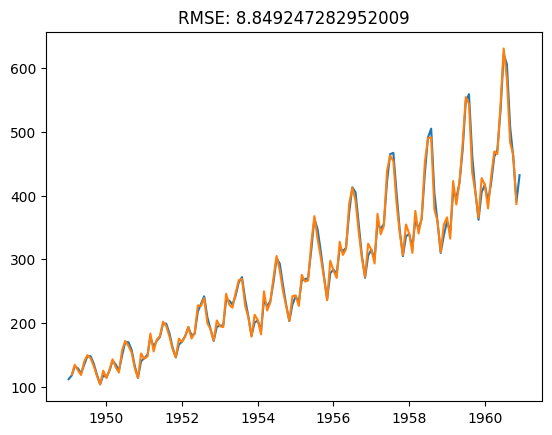

In [ ]:
plt.plot(data)
plt.plot(predictions_ARIMA.shift(periods =-1))
na = predictions_ARIMA.isna()
predictions_ARIMA = predictions_ARIMA.dropna()
data = data.dropna()
RMSE = np.sqrt((((predictions_ARIMA.shift(periods =-1) - data)**2).sum())/len(data))
plt.title(f'RMSE: {RMSE}')

# 2. Aplicación a otros datos: Acciones en bolsa S&P 500 stock data


Vamos a cargar ahora los datos sobre las acciones en bolsa del fichero *stocks_1yr.csv*:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stocks_1yr.csv to stocks_1yr.csv


Esta base de datos contiene los datos para las acciones (*stocks*) de un año, y por columnas, contiene los siguientes campos:


* Date - en formato: yy-mm-dd

* Open - precio de la acción en la apertura de la bolsa

* High - precio más alto alcanzado en el día

* Low Close - precio más bajo en el día

* Volume - Número de acciones vendidas/compradas

* Name - Nombre de la compañía

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

data = read_csv('stocks_1yr.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(data.head())

             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


<ipython-input-102-bc01791b48a6>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-102-bc01791b48a6>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = read_csv('stocks_1yr.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


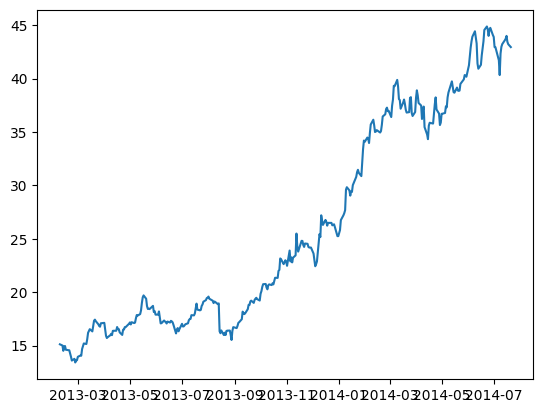

In [ ]:
from matplotlib import pyplot as plt
plt.plot(data.high)

**PREGUNTAS**

Utilizando las herramientas del apartado 1, realiza el análisis de esta serie (puedes utilizar un intervalo de ella o la serie completa).

En concreto:
1.   Analiza la estacionariedad de esta serie.
2.   ¿Qué transformaciones puedes realizar para hacerla más estacionaria? Prueba algunas y justifica si consigues una serie más estacionaria.
3.   Ajusta un modelo ARIMA, y calcula el error de predicción.



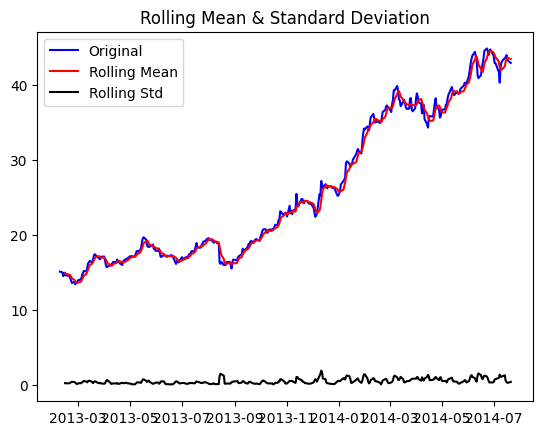

Results of Dickey-Fuller Test:
Test Statistic                   0.239126
p-value                          0.974373
#Lags Used                       3.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


In [ ]:
bolsa = data["high"]
test_stationarity(bolsa,5)

Observando tanto la tendencia como el p-valor = 0.97 no podemos rechazar la hipótesis nula, por tanto, asumimos que la serie no es estacionaria.

Para hacerla más estacionaria probaremos con el logaritmo y la raiz cuadrada.

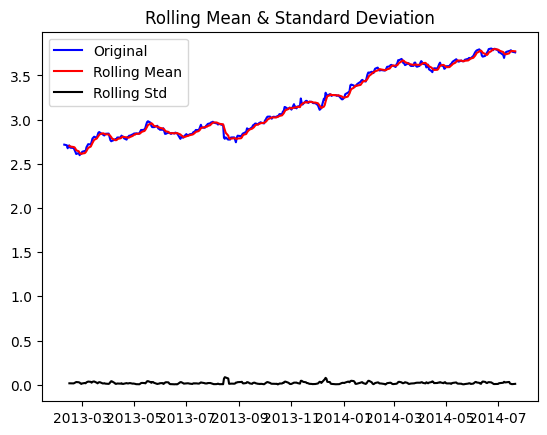

Results of Dickey-Fuller Test:
Test Statistic                  -0.320296
p-value                          0.922580
#Lags Used                       1.000000
Number of Observations Used    362.000000
Critical Value (1%)             -3.448544
Critical Value (5%)             -2.869557
Critical Value (10%)            -2.571041
dtype: float64


In [ ]:
bolsa_log = np.log(bolsa)
test_stationarity(bolsa_log,5)

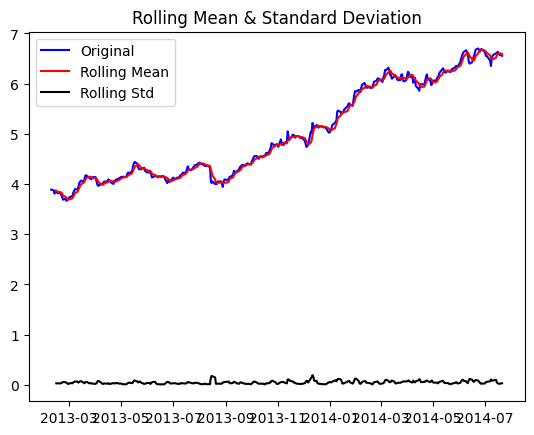

Results of Dickey-Fuller Test:
Test Statistic                  -0.103954
p-value                          0.949043
#Lags Used                       1.000000
Number of Observations Used    362.000000
Critical Value (1%)             -3.448544
Critical Value (5%)             -2.869557
Critical Value (10%)            -2.571041
dtype: float64


In [ ]:
bolsa_sqrt = np.sqrt(bolsa)
test_stationarity(bolsa_sqrt,5)

Tras aplicar el logaritmo y la raiz cuadrada a los datos, observamos que no se consigue estacionariedad con ninguno de ellos, sin embargo observamos que el p-valor se ha reducido en ambos casos (lo que indica que estamos más cerca de rechazar la hipótesis nula). Usando el p-valor como criterio para seleccionar alguna de las 2 trasformaciones nos quedaremos con el logaritmo ya que es el que tiene menor p-valor.

In [ ]:
#ACF and PACF plots:
data_log = np.log(bolsa)
data_log_diff = data_log - data_log.shift()
data_log_diff = data_log_diff.dropna()
lag_acf = acf(data_log_diff, nlags=20, fft=False)
lag_pacf = pacf(data_log_diff, nlags=20,method='ols')

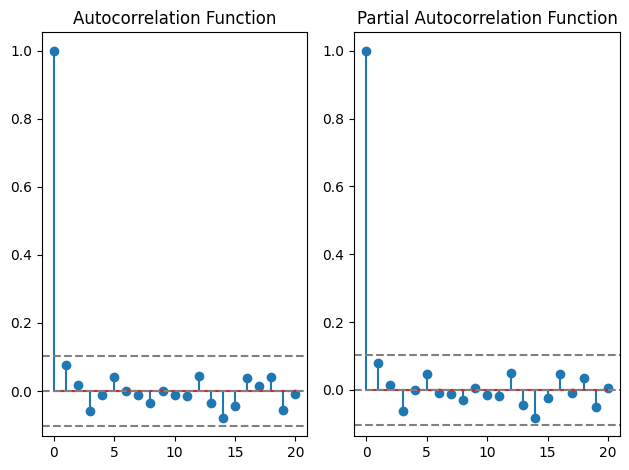

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Siguiendo el criterio mencionado anteriormente nos quedamos con p=1 y q=1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Modelo ARIMA RSS: 0.0017211336259893317')

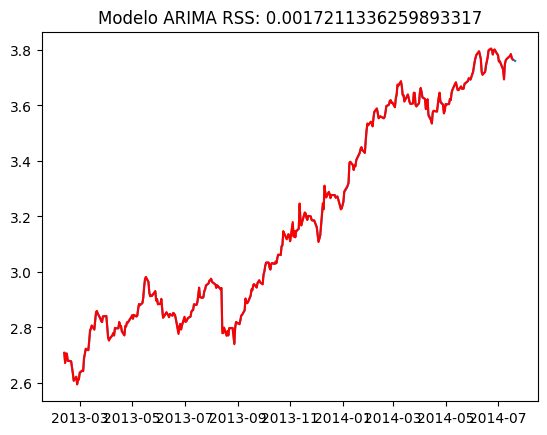

In [ ]:
p =1
d =1
q =1

# AR
model = ARIMA(data_log, order=(p, d, q))
results_ARMA = model.fit()
plt.plot(data_log[1:])
plt.plot(results_ARMA.fittedvalues[1:].shift(periods =-1), color='red')
RSS = results_ARMA.fittedvalues[1:].shift(periods =-1)-data_log[1:]
RSS = RSS.dropna()
plt.title('Modelo ARIMA ' + f"RSS: {sum(RSS**2)}")
# RSS: Residual sum of squares

In [ ]:
# Predicciones en el espacio original
predictions_ARIMA_log = pd.Series(results_ARMA.fittedvalues, copy=True)
print(predictions_ARIMA_log.head())

date
2013-02-08    0.000000
2013-02-11    2.716018
2013-02-12    2.707989
2013-02-13    2.671406
2013-02-14    2.706410
dtype: float64


In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log[1:])

Text(0.5, 1.0, 'RMSE:\xa00.05776753959553806')

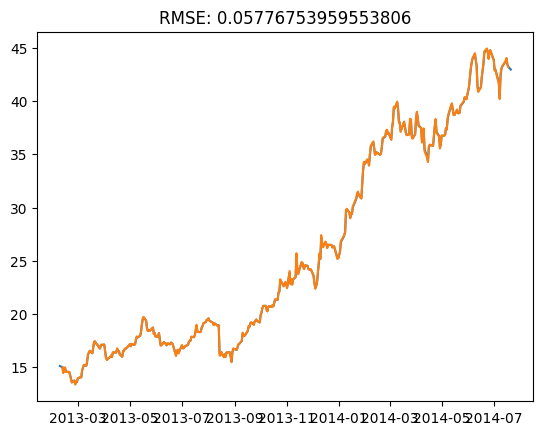

In [ ]:
plt.plot(bolsa)
plt.plot(predictions_ARIMA.shift(periods =-1))
na = predictions_ARIMA.isna()
predictions_ARIMA = predictions_ARIMA.dropna()
data = data.dropna()
RMSE = np.sqrt((((predictions_ARIMA.shift(periods =-1) - bolsa)**2).sum())/len(data))
plt.title(f'RMSE: {RMSE}')

Tras ajustar el modelo hemos obtenido un RMSE = 0.057.